<a href="https://colab.research.google.com/github/gustikresna/purwadhika-assignment/blob/main/Modul_3_Exercise_2_Assessing_Model_Fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ad_conversion.csv to ad_conversion.csv


In [ ]:
# read the dataset
ad_conversion = pd.read_csv('ad_conversion.csv')

In [ ]:
# print head
ad_conversion.head(5)

,spent_usd,n_impressions,n_clicks
0,1.43,7350,1
1,1.82,17861,2
2,1.25,4259,1
3,1.29,4133,1
4,4.77,15615,3


In [ ]:
# print tail
ad_conversion.tail(5)

,spent_usd,n_impressions,n_clicks
931,358.189997,1129773,252
932,173.880003,637549,120
933,40.289999,151531,28
934,198.710000,790253,135
935,165.609999,513161,114


In [ ]:
# print shape
ad_conversion.shape

(936, 3)

## Transforming the response variable

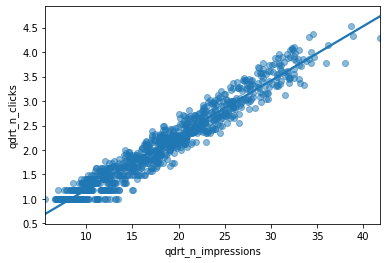

In [ ]:
# Create a qdrt_n_impressions column using n_impressions raised to the power of 0.25.
ad_conversion["qdrt_n_impressions"] = ad_conversion['n_impressions']**0.25

# Create a qdrt_n_clicks column using n_clicks raised to the power of 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion['n_clicks']**0.25

# Plot using the transformed variables
sns.regplot(x='qdrt_n_impressions',
         y='qdrt_n_clicks',
         data= ad_conversion,
         ci=None,
         scatter_kws={'alpha': 0.5})
plt.show()

In [ ]:
ad_conversion.head()

,spent_usd,n_impressions,n_clicks,qdrt_n_impressions,qdrt_n_clicks
0,1.43,7350,1,9.259165,1.000000
1,1.82,17861,2,11.560495,1.189207
2,1.25,4259,1,8.078429,1.000000
3,1.29,4133,1,8.018006,1.000000
4,4.77,15615,3,11.178551,1.316074


In [ ]:
# Import the ols() function from the statsmodels.formula.api package.
from statsmodels.formula.api import ols

# Run a linear regression of qdrt_n_clicks versus qdrt_n_impressions using ad_conversion and assign it to mdl_click_vs_impression.
mdl_click_vs_impression = ols(formula='qdrt_n_clicks ~ qdrt_n_impressions',data=ad_conversion).fit()

In [ ]:
# Use this explanatory data
explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** 0.25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data['qdrt_n_impressions'])
)

# Print the result
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000            0.0       0.071748
1           26.591479       500000.0       3.037576
2           31.622777      1000000.0       3.598732
3           34.996355      1500000.0       3.974998
4           37.606031      2000000.0       4.266063
5           39.763536      2500000.0       4.506696
6           41.617915      3000000.0       4.713520


## Back transformation

In script above, you transformed the response variable, ran a regression, and made predictions. But you're not done yet! In order to correctly interpret and visualize your predictions, you'll need to do a back-transformation.

In [ ]:
# Back transform the response variable in prediction_data by raising qdrt_n_clicks to the power 4 to get n_clicks.
prediction_data["n_clicks"] = ____
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks    n_clicks
0            0.000000            0.0       0.071748    0.000026
1           26.591479       500000.0       3.037576   85.135121
2           31.622777      1000000.0       3.598732  167.725102
3           34.996355      1500000.0       3.974998  249.659131
4           37.606031      2000000.0       4.266063  331.214159
5           39.763536      2500000.0       4.506696  412.508546
6           41.617915      3000000.0       4.713520  493.607180


In [ ]:
# Back transform the response variable in prediction_data by raising qdrt_n_clicks to the power 4 to get n_clicks.
prediction_data["n_clicks"] = prediction_data['qdrt_n_clicks']**4
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks    n_clicks
0            0.000000            0.0       0.071748    0.000026
1           26.591479       500000.0       3.037576   85.135121
2           31.622777      1000000.0       3.598732  167.725102
3           34.996355      1500000.0       3.974998  249.659131
4           37.606031      2000000.0       4.266063  331.214159
5           39.763536      2500000.0       4.506696  412.508546
6           41.617915      3000000.0       4.713520  493.607180


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


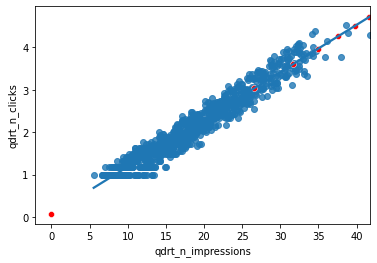

In [ ]:
# Plot the transformed variables
fig = plt.figure()
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)

# Edit the plot to add a layer of points from prediction_data, colored "red".
sns.scatterplot('qdrt_n_impressions', 'qdrt_n_clicks', data=prediction_data, color='red')
plt.show()

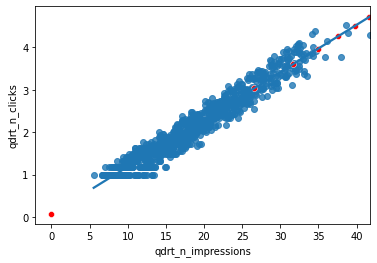

In [ ]:
# Plot the transformed variables
fig = plt.figure()
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)

# Edit the plot to add a layer of points from prediction_data, colored "red".
sns.scatterplot(x='qdrt_n_impressions', y='qdrt_n_clicks', data=prediction_data, color='red')
plt.show()

## Coefficient of determination

The coefficient of determination is a measure of how well the linear regression line fits the observed values. For simple linear regression, it is equal to the square of the correlation between the explanatory and response variables.

Here, you'll take another look at the second stage of the advertising pipeline: modeling the click response to impressions

In [ ]:
ad_conversion.head()

,spent_usd,n_impressions,n_clicks,qdrt_n_impressions,qdrt_n_clicks
0,1.43,7350,1,9.259165,1.000000
1,1.82,17861,2,11.560495,1.189207
2,1.25,4259,1,8.078429,1.000000
3,1.29,4133,1,8.018006,1.000000
4,4.77,15615,3,11.178551,1.316074


In [ ]:
mdl_click_vs_impression_orig = ols('', data = ad_conversion).fit()
mdl_click_vs_impression_trans = ols('', data = ad_conversion).fit()

In [ ]:
mdl_click_vs_impression_orig = ols(formula='n_clicks ~ n_impressions', data = ad_conversion).fit()
mdl_click_vs_impression_trans = ols(formula='qdrt_n_clicks ~ qdrt_n_impressions', data = ad_conversion).fit()

In [ ]:
# Print a summary of mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.summary())

# Print a summary of mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.summary())

                            OLS Regression Results                            
Dep. Variable:               n_clicks   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     7683.
Date:                Sun, 23 May 2021   Prob (F-statistic):               0.00
Time:                        08:43:10   Log-Likelihood:                -4126.7
No. Observations:                 936   AIC:                             8257.
Df Residuals:                     934   BIC:                             8267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6829      0.789      2.133

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Print the coeff of determination for mdl_click_vs_impression_orig
# Use the .rsquared attribute of both models.
print(mdl_click_vs_impression_orig.rsquared)

# Print the coeff of determination for mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.rsquared)

0.8916134973508041
0.9445272817143905


## Residual standard error

Residual standard error (RSE) is a measure of the typical size of the residuals. Equivalently, it's a measure of how wrong you can expect predictions to be. Smaller numbers are better, with zero being a perfect fit to the data.

In [ ]:
# Print the residual standard error of mdl_click_vs_impression_orig by taking the square root of the .mse_resid attribute.
# You can retrieve the MSE from the .mse_resid attribute.
# Take the square root of the MSE to get the RSE using np.sqrt().
mse_orig = mdl_click_vs_impression_orig.mse_resid

# Calculate rse_orig for mdl_click_vs_impression_orig and print it
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig)

# Calculate mse_trans for mdl_click_vs_impression_trans
mse_trans = mdl_click_vs_impression_trans.mse_resid

# Calculate rse_trans for mdl_click_vs_impression_trans and print it
rse_trans = np.sqrt(mse_trans)
print("RSE of transformed model: ", rse_trans)

RSE of original model:  19.905838862478138
RSE of transformed model:  0.19690640896875722


In [ ]:
# Print the residual standard error of mdl_click_vs_impression_orig by taking the square root of the .mse_resid attribute.
# You can retrieve the MSE from the .mse_resid attribute.
# Take the square root of the MSE to get the RSE using np.sqrt().
mse_orig = mdl_click_vs_impression_orig.mse_resid

# Calculate rse_orig for mdl_click_vs_impression_orig and print it
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig)

# Calculate mse_trans for mdl_click_vs_impression_trans
mse_trans = mdl_click_vs_impression_trans.mse_resid

# Calculate rse_trans for mdl_click_vs_impression_trans and print it
rse_trans = np.sqrt(mse_trans)
print("RSE of transformed model: ", rse_trans)

RSE of original model:  19.905838862478138
RSE of transformed model:  0.19690640896875722


## Drawing diagnostic plots

It's time for you to draw these diagnostic plots yourself using the Taiwan real estate dataset and the model of house prices versus number of convenience stores.

This section using taiwan real estate data. You have to recall your skill in previous exercise

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving taiwan_real_estate2.csv to taiwan_real_estate2.csv


In [ ]:
# read the dataset
taiwan_real_estate = pd.read_csv('taiwan_real_estate2.csv')

In [ ]:
# Run a linear regression with price_twd_msq as the response variable, n_convenience as the explanatory variable, and taiwan_real_estate as the dataset. Name it mdl_price_vs_conv.
mdl_price_vs_conv = ols(formula='price_twd_msq ~ n_convenience', data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

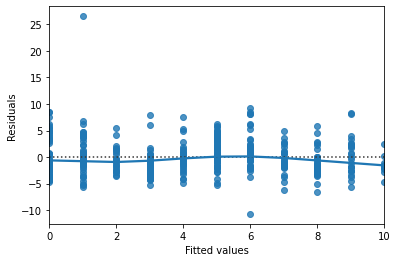

In [ ]:
# Create the residuals versus fitted values plot. Add a lowess argument to visualize the trend of the residuals.
# The residplot() function can be used to create a residuals versus fitted plot.
# You need to define the explanatory and response variable as the x and y arguments in the residplot() function, respectively.
sns.residplot(x=____, y=____, data=taiwan_real_estate, ____)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()

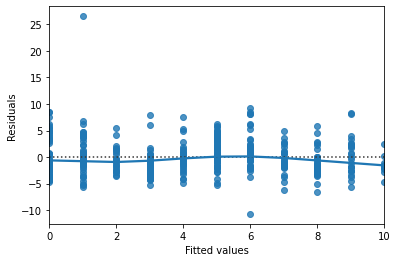

In [ ]:
# Create the residuals versus fitted values plot. Add a lowess argument to visualize the trend of the residuals.
# The residplot() function can be used to create a residuals versus fitted plot.
# You need to define the explanatory and response variable as the x and y arguments in the residplot() function, respectively.
sns.residplot(x='n_convenience', y='price_twd_msq', data=taiwan_real_estate,lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()

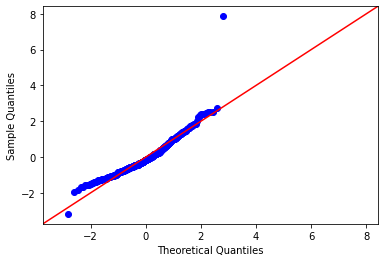

In [ ]:
# Import qqplot() from statsmodels.api.
# qqplot() is used to draw a Q-Q plot of the residuals. It takes the residuals from the model as the data argument.
from statsmodels.api import qqplot

# Create the Q-Q plot of the residuals
____(data=____.____, fit=True, line="45")

# Show the plot
plt.show()

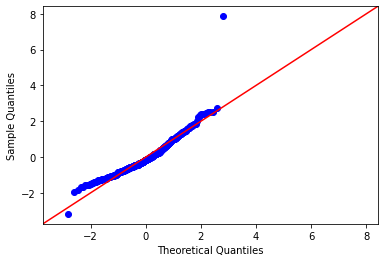

In [ ]:
# Import qqplot() from statsmodels.api.
# qqplot() is used to draw a Q-Q plot of the residuals. It takes the residuals from the model as the data argument.
from statsmodels.api import qqplot

# Create the Q-Q plot of the residuals
qqplot(data=mdl_price_vs_conv.resid, fit=True, line="45")

# Show the plot
plt.show()